In [1]:
# skeleton code for computing gwb - 
# need to figure out merger tree for population and then seed BHs

import numpy as np
import matplotlib.pyplot as plt

class GWB:
    def __init__(self, seed_model, merger_model):
        self.seed_model = seed_model
        self.merger_model = merger_model
        
    def background(self, time_array):


class SeedModel:
    def __init__(self,):


class MergerModel:
    def __init__(self, data):
        self.data = data
        

In [26]:
class HeavySeedModel:
    def __init__(self, Qc=2.0):
        self.Qc = Qc

    def form_seeds(self, z_start=20, z_stop=15):
       
        # Placeholder for the simulation 
        seed_masses = []

        for z in range(z_start, z_stop - 1, -1):
            # model here!!
            seed_mass = self._calculate_seed_mass(z)
            seed_masses.append(seed_mass)

        return seed_masses

    def _calculate_seed_mass(self, redshift):
        # Placeholder for the seed mass calc
        # critical Toomre parameter Qc?
        seed_mass = 1e5 

        return seed_mass


if __name__ == "__main__":
    # Create an instance of the HeavySeedModel
    heavy_seed_model = HeavySeedModel(Qc=2.0)

    # Simulate the formation of MBH seeds
    seeds = heavy_seed_model.form_seeds(z_start=20, z_stop=15)

    print("MBH Seed Masses:", seeds)

MBH Seed Masses: [100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0]


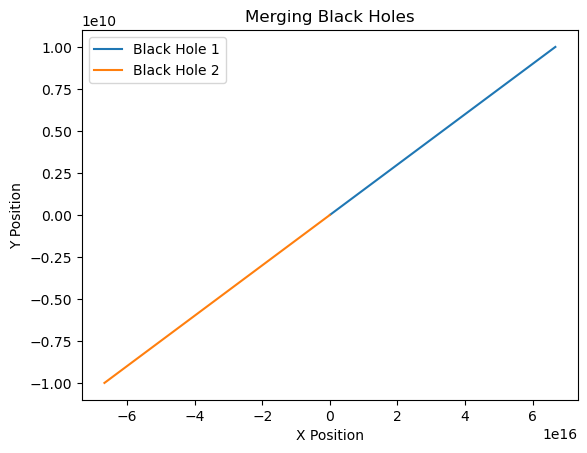

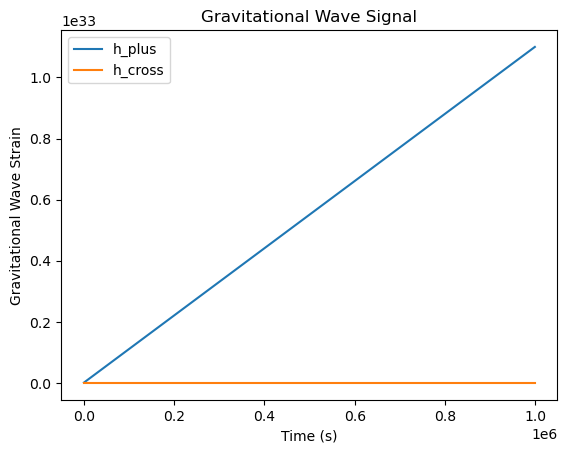

In [37]:
import numpy as np
import matplotlib.pyplot as plt

class BlackHole:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)

def gravitational_force(bh1, bh2):
    G = 6.67430e-11  # Gravitational constant (m^3 kg^−1 s^−2)
    r = np.linalg.norm(bh1.position - bh2.position)
    force_magnitude = G * bh1.mass * bh2.mass / r**2
    force_direction = (bh2.position - bh1.position) / r
    gravitational_force = force_magnitude * force_direction
    return gravitational_force

def update_position_velocity(bh1, bh2, dt):
    force = gravitational_force(bh1, bh2)
    acceleration_bh1 = force / bh1.mass
    acceleration_bh2 = -force / bh2.mass

    bh1.velocity += acceleration_bh1 * dt
    bh2.velocity += acceleration_bh2 * dt

    bh1.position += bh1.velocity * dt
    bh2.position += bh2.velocity * dt

def calculate_strain(bh1, bh2, observer_distance):
    G = 6.67430e-11  # Gravitational constant (m^3 kg^−1 s^−2)
    c = 3.0e8  # Speed of light (m/s)

    r = np.linalg.norm(bh1.position - bh2.position)
    h_plus = (G / (c**4 * r)) * (bh1.mass * bh2.mass) * np.dot(bh1.position - bh2.position, bh1.position - bh2.position)
    h_cross = (2 * G / (c**4 * r)) * (bh1.mass * bh2.mass) * np.dot(bh1.position - bh2.position, np.cross(bh1.velocity, bh1.position - bh2.position)) / r

    return h_plus, h_cross

def simulate_merger(bh1, bh2, total_time, dt, observer_distance):
    time_points = np.arange(0, total_time, dt)
    positions_bh1 = []
    positions_bh2 = []
    gravitational_waves = []

    for _ in time_points:
        update_position_velocity(bh1, bh2, dt)
        positions_bh1.append(np.copy(bh1.position))
        positions_bh2.append(np.copy(bh2.position))

        h_plus, h_cross = calculate_strain(bh1, bh2, observer_distance)
        gravitational_waves.append((h_plus, h_cross))

    return np.array(positions_bh1), np.array(positions_bh2), np.array(gravitational_waves)


if __name__ == "__main__":
    # Initial conditions for two black holes
    bh1 = BlackHole(mass=1e30, position=[0, 0, 0], velocity=[0, 1e4, 0])
    bh2 = BlackHole(mass=1e30, position=[1e6, 0, 0], velocity=[0, -1e4, 0])

    # Simulation parameters
    total_time = 1e6  # Total simulation time (seconds)
    dt = 1e3  # Time step (seconds)
    observer_distance = 1e20  # Distance to observer (for gravitational wave strain calculation)

    # Simulate the merger
    positions_bh1, positions_bh2, gravitational_waves = simulate_merger(bh1, bh2, total_time, dt, observer_distance)

    # Plot the trajectories of the black holes
    plt.plot(positions_bh1[:, 0], positions_bh1[:, 1], label='Black Hole 1')
    plt.plot(positions_bh2[:, 0], positions_bh2[:, 1], label='Black Hole 2')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Merging Black Holes')
    plt.legend()
    plt.show()

    # Plot the gravitational wave strain
    time_points = np.arange(0, total_time, dt)
    h_plus, h_cross = gravitational_waves.T
    plt.plot(time_points, h_plus, label='h_plus')
    plt.plot(time_points, h_cross, label='h_cross')
    plt.xlabel('Time (s)')
    plt.ylabel('Gravitational Wave Strain')
    plt.title('Gravitational Wave Signal')
    plt.legend()
    plt.show()

In [25]:
class DarkMatterHalo:
    def __init__(self, id, mass, redshift):
        self.id = id
        self.mass = mass
        self.redshift = redshift
        self.progenitor = []

def build_merger_tree(halo, num_generations, max_progenitors):
    if num_generations == 0:
        return

    for i in range(max_progenitors):
        progenitor_id = f"{halo.id}-{i+1}"
        progenitor_mass = halo.mass * 0.8  # progenitor mass is 80% of parent mass
        progenitor_redshift = halo.redshift + 1  # Redshift increases by 0.1 for each generation

        progenitor_halo = DarkMatterHalo(progenitor_id, progenitor_mass, progenitor_redshift)
        halo.progenitor.append(progenitor_halo)

        build_merger_tree(progenitor_halo, num_generations - 1, max_progenitors)

def print_merger_tree(halo, indent=0):
    print("  " * indent + f"ID: {halo.id}, Mass: {halo.mass}, Redshift: {halo.redshift}")
    for progenitor in halo.progenitor:
        print_merger_tree(progenitor, indent + 1)

if __name__ == "__main__":
    root_halo = DarkMatterHalo("root", 1e12, 0.0)  # Initial mass is 1e12 Msun, redshift is 0
    build_merger_tree(root_halo, num_generations=5, max_progenitors=2)

    print("Dark Matter Halo Merger Tree:")
    print_merger_tree(root_halo)

Dark Matter Halo Merger Tree:
ID: root, Mass: 1000000000000.0, Redshift: 0.0
  ID: root-1, Mass: 800000000000.0, Redshift: 1.0
    ID: root-1-1, Mass: 640000000000.0, Redshift: 2.0
      ID: root-1-1-1, Mass: 512000000000.0, Redshift: 3.0
        ID: root-1-1-1-1, Mass: 409600000000.0, Redshift: 4.0
          ID: root-1-1-1-1-1, Mass: 327680000000.0, Redshift: 5.0
          ID: root-1-1-1-1-2, Mass: 327680000000.0, Redshift: 5.0
        ID: root-1-1-1-2, Mass: 409600000000.0, Redshift: 4.0
          ID: root-1-1-1-2-1, Mass: 327680000000.0, Redshift: 5.0
          ID: root-1-1-1-2-2, Mass: 327680000000.0, Redshift: 5.0
      ID: root-1-1-2, Mass: 512000000000.0, Redshift: 3.0
        ID: root-1-1-2-1, Mass: 409600000000.0, Redshift: 4.0
          ID: root-1-1-2-1-1, Mass: 327680000000.0, Redshift: 5.0
          ID: root-1-1-2-1-2, Mass: 327680000000.0, Redshift: 5.0
        ID: root-1-1-2-2, Mass: 409600000000.0, Redshift: 4.0
          ID: root-1-1-2-2-1, Mass: 327680000000.0, Redshif

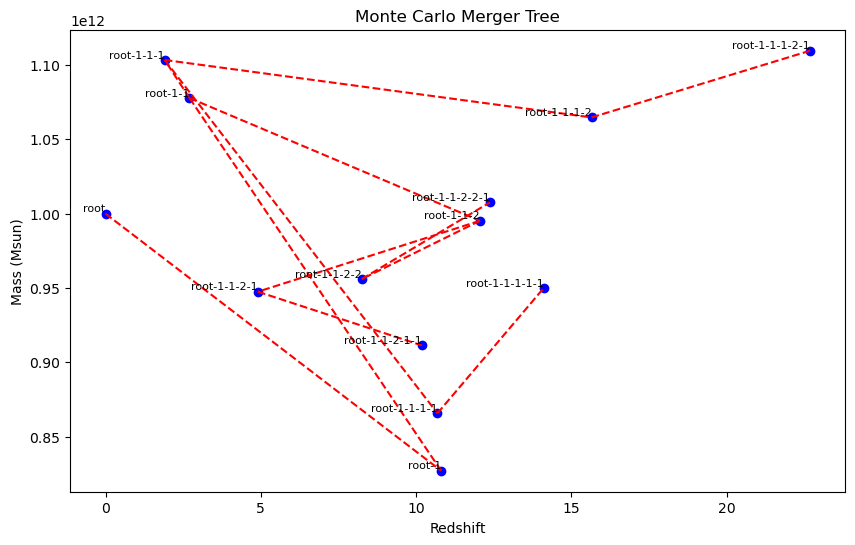

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class DarkMatterHalo:
    def __init__(self, id, mass, redshift):
        self.id = id
        self.mass = mass
        self.redshift = redshift
        self.children = []

def generate_random_merger_tree(halo, num_generations, max_children, mass_mean, mass_std, redshift_mean, redshift_std):
    if num_generations == 0:
        return

    for i in range(np.random.randint(1, max_children + 1)):
        child_id = f"{halo.id}-{i+1}"
        child_mass = max(0, np.random.normal(mass_mean, mass_std))  # Ensure mass is non-negative
        child_redshift = max(0, np.random.normal(redshift_mean, redshift_std))  # Ensure redshift is non-negative

        child_halo = DarkMatterHalo(child_id, child_mass, child_redshift)
        halo.children.append(child_halo)

        generate_random_merger_tree(child_halo, num_generations - 1, max_children, mass_mean, mass_std, redshift_mean, redshift_std)

def visualize_merger_tree(root_halo):
    plt.figure(figsize=(10, 6))
    plot_merger_tree(root_halo, 0)
    plt.title("Monte Carlo Merger Tree")
    plt.xlabel("Redshift")
    plt.ylabel("Mass (Msun)")
    plt.show()

def plot_merger_tree(halo, depth):
    plt.scatter(halo.redshift, halo.mass, color='b')
    plt.text(halo.redshift, halo.mass, halo.id, fontsize=8, ha='right', va='bottom')

    for child in halo.children:
        plt.plot([halo.redshift, child.redshift], [halo.mass, child.mass], color='r', linestyle='dashed')
        plot_merger_tree(child, depth + 1)

if __name__ == "__main__":
    root_halo = DarkMatterHalo("root", 1e12, 0.0)
    generate_random_merger_tree(root_halo, num_generations=, max_children=2, mass_mean=1e12, mass_std=1e11, redshift_mean=10, redshift_std=5)

    visualize_merger_tree(root_halo)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

class Halo:
    def __init__(self, mass, redshift):
        self.mass = mass
        self.redshift = redshift
        self.progenitors = []

def dN_dM1(M1, M2):
    # need to figure out what this function is!
    return

def calculate_P(Mres, M2_over_2, M1, M2):
    integrand = lambda M1: dN_dM1(M1, M2)
    P, _ = quad(integrand, Mres, M2_over_2)
    return P

def calculate_F(Mres, M2_over_2, M1, M2):
    integrand = lambda M1: dN_dM1(M1,m2)*(M1/M2)
    F, _ = quad(integrand, Mres, M2_over_2)
    return F

def generate_merger_tree(halo, dt, P, F, Mres):
    while dt > 0:
        R = np.random.uniform(0, 1)  # Generate random no. R
        if R > P:
            # No fragmentation, reduce mass due to accretion
            halo.mass *= (1 - F)
        else:
            # Fragmentation, generate two progenitors

            M1 = np.random.uniform(Mres, halo.mass / 2)
            
            M2_over_2 = halo.mass / 2
            P = calculate_P(Mres, M2_over_2, M1, halo.mass)
            
            progenitor1 = Halo(M1, halo.redshift - dt)
            progenitor2 = Halo(halo.mass*(1 - F) - M1, halo.redshift - dt)
            halo.progenitors.extend([progenitor1, progenitor2])

            # Recursively generate merger tree for progenitors
            generate_merger_tree(progenitor1, dt, P, F, Mres)
            generate_merger_tree(progenitor2, dt, P, F, Mres)

def plot_merger_tree(halo, color='b'):
    for progenitor in halo.progenitors:
        plt.plot([halo.redshift, progenitor.redshift], [halo.mass, progenitor.mass], marker='o', linestyle='-', color=color)
        plot_merger_tree(progenitor, color)

if __name__ == "__main__":
    # Parameters
    dt = 1  # Time step
    Mres = 1e10  # Mass resolution limit

    # Initial halo
    initial_mass = 1e12
    initial_redshift = 0
    root_halo = Halo(initial_mass, initial_redshift)

    # Generate merger tree
    generate_merger_tree(root_halo, dt, P, F, Mres)

    # Plot the merger tree
    plot_merger_tree(root_halo)

    # Customize plot
    plt.xlabel('Redshift')
    plt.ylabel('Halo Mass')
    plt.title('Dark Matter Halo Merger Tree')
    plt.show()

NameError: name 'P' is not defined

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class Halo:
    def __init__(self, mass, redshift):
        self.mass = mass
        self.redshift = redshift
        self.progenitors = []

def generate_merger_tree(halo, dt, max_progenitors):
    progenitors_number = 0
    while progenitors_number < max_progenitors:
        # generate two progenitors
        M1 = np.random.uniform(0, halo.mass)
        progenitor1 = Halo(M1, halo.redshift - dt)
        progenitor2 = Halo(halo.mass - M1, halo.redshift - dt)
        halo.progenitors.extend([progenitor1, progenitor2])

        # Recursively generate merger tree for progenitors
        generate_merger_tree(progenitor1, dt, max_progenitors)
        generate_merger_tree(progenitor2, dt, max_progenitors)

        progenitors_number += 2    

def plot_merger_tree(halo, color='b'):
    plt.plot(halo.redshift, halo.mass, marker='o', linestyle='-', color=color)
    for progenitor in halo.progenitors:
        plt.plot([halo.redshift, progenitor.redshift], [halo.mass, progenitor.mass], marker='o', linestyle='-', color=color)
        plot_merger_tree(progenitor, color)

if __name__ == "__main__":
    # parameters
    dt = 0.5  # time step
    max_progenitors = 5

    # Initial halo
    initial_mass = 1e12
    initial_redshift = 0
    root_halo = Halo(initial_mass, initial_redshift)

    # generate
    generate_merger_tree(root_halo, dt, max_progenitors)

    # plot
    plot_merger_tree(root_halo)

    plt.xlabel('Redshift')
    plt.ylabel('Halo Mass')
    plt.title('Monte Carlo Merger Tree')
    plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

Redshift: 15, Remaining Progenitors: 3
Redshift: 15.5, Remaining Progenitors: 0
Redshift: 15.5, Remaining Progenitors: 0
Redshift: 15.5, Remaining Progenitors: 2
Redshift: 16.0, Remaining Progenitors: 1
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.0, Remaining Progenitors: 1
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 15.5, Remaining Progenitors: 2
Redshift: 16.0, Remaining Progenitors: 1
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.0, Remaining Progenitors: 1
Redshift: 16.5, Remaining Progenitors: 0
Redshift: 16.5, Remaining Progenitors: 0


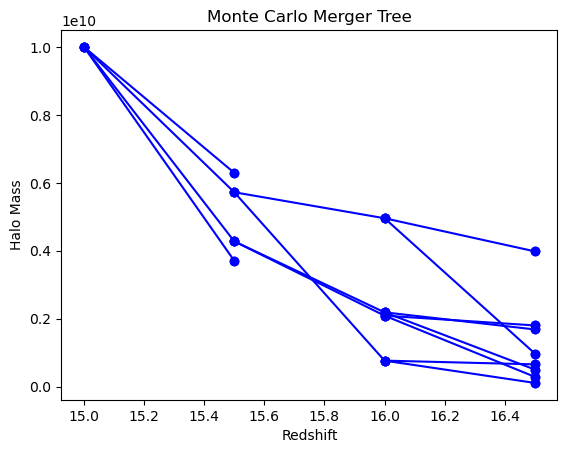

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Halo:
    def __init__(self, mass, redshift):
        self.mass = mass
        self.redshift = redshift
        self.progenitors = []

def generate_merger_tree(initial_halo, dt, max_progenitors):
    stack = [(initial_halo, max_progenitors)]  # initialise empty list
    
    while stack:
        current_halo, remaining_progenitors = stack.pop()  # unpack variables
        
        # continues until list empty
        print(f'Redshift: {current_halo.redshift}, Remaining Progenitors: {remaining_progenitors}')

        while remaining_progenitors > 0:
            M = np.random.uniform(0, current_halo.mass)  # choose random mass to 'split' halo
            progenitor_1 = Halo(M, current_halo.redshift + dt)  # generate 2 progenitors and increase redshift
            progenitor_2 = Halo(current_halo.mass - M, current_halo.redshift + dt)
            current_halo.progenitors.extend([progenitor_1, progenitor_2])  # merging history list of the current halo

            stack.append((progenitor_1, remaining_progenitors - 1))  # add to the list and reduce remaining progenitors
            stack.append((progenitor_2, remaining_progenitors - 1))

            remaining_progenitors -= 2  # 2 progenitors generated for the current halo
            
def plot_merger_tree(halo, color='b'):
    plt.plot(halo.redshift, halo.mass, marker='o', linestyle='-', color=color)
    for progenitor in halo.progenitors:
        plt.plot([halo.redshift, progenitor.redshift], [halo.mass, progenitor.mass], marker='o', linestyle='-', color=color)
        plot_merger_tree(progenitor, color)

if __name__ == "__main__":
    # parameters
    dt = 0.5  # time step
    max_progenitors = 3  # each branch can have up to 5 progenitors

    # Initial halo
    initial_mass = 1e10
    initial_redshift = 15
    initial_halo = Halo(initial_mass, initial_redshift)

    # generate
    generate_merger_tree(initial_halo, dt, max_progenitors)

    # plot
    plot_merger_tree(initial_halo)
    plt.xlabel('Redshift')
    plt.ylabel('Halo Mass')
    plt.title('Monte Carlo Merger Tree')
    plt.show()